In [1]:
import errno
import os
# import tensorflow as tf
import urllib



def maybe_download(url, local_dir, expected_bytes):
    """Download a file if not present, and make sure it's the right size."""
    mkdir_p(local_dir)
    local_filename = url.split('/')[-1]
    local_filepath = os.path.join(local_dir, local_filename)
    if not os.path.exists(local_filepath):
        print("Downloading %s..." % local_filename)
        local_filename, _ = urllib.request.urlretrieve(url,
                                                       local_filepath)
        print("Finished!")
    statinfo = os.stat(local_filepath)
    if statinfo.st_size == expected_bytes:
        print('Found and verified', local_filepath)
    else:
        print(statinfo.st_size)
        raise Exception('Failed to verify ' + local_filename +
                        '. Can you get to it with a browser?')
    return local_filename


def mkdir_p(path):
    """From https://stackoverflow.com/questions/600268/mkdir-p-functionality-in-python"""
    try:
        os.makedirs(path)
    except OSError as exc:  # Python >2.5
        if exc.errno == errno.EEXIST and os.path.isdir(path):
            pass
        else:
            raise


def get_session():
    """Create a session that dynamically allocates memory."""
    # See: https://www.tensorflow.org/tutorials/using_gpu#allowing_gpu_memory_growth
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    session = tf.Session(config=config)
    return session

In [2]:
import zipfile

import numpy as np

# maybe_download('http://nlp.stanford.edu/data/glove.6B.zip', 'datasets', 862182613)
# if not os.path.exists(os.path.join("datasets", "glove.6B.50d.txt")):
#     with zipfile.ZipFile(os.path.join("datasets", "glove.6B.zip"), "r") as zip_ref:
#         zip_ref.extractall("datasets")
#     for f in ["glove.6B.100d.txt", "glove.6B.300d.txt", "glove.6B.200d.txt"]:
#         os.remove(os.path.join('datasets', f))

In [3]:
import os
import numpy as np
# import tensorflow as tf

def load_embeddings(filename):
    vocab = []
    embed = []
    with open(filename, 'r', encoding="utf-8") as f:
        for line in f.readlines():
            row = line.strip().split(' ')
            vocab.append(row[0])
            embed.append(row[1:])
    embed = np.asarray(embed)
    return vocab, embed


# Load the GloVe vectors into numpy
# glove_filepath = os.path.join('datasets', 'glove.6B.50d.txt')
glove_filepath = '/Users/akhiljalan/Desktop/glove.6B.50d.txt'
vocab, embed = load_embeddings(glove_filepath)
vocab_size = len(vocab)
embed_dim = len(embed[0])
assert vocab_size > 0, "The vocabulary shouldn't be empty; did you download the GloVe weights?"
print('Loaded %d %d-dimensional embeddings.' % (vocab_size, embed_dim))

# word2id = {}
# id2word = vocab
# for i, w in enumerate(id2word):
#     word2id[w] = i

# Ops to load the embeddings into TensorFlow
# embedding = tf.Variable(tf.constant(0.0, shape=[vocab_size, embed_dim]),
#                         trainable=False, name="embedding")
# embedding_placeholder = tf.placeholder(tf.float32, [vocab_size, embed_dim])
# embedding_init = embedding.assign(embedding_placeholder)

Loaded 400000 50-dimensional embeddings.


TODO pick general categories later.

In [4]:
def get_embed_for_words(words):
    word_embeds = []
    final_words = []
    for i in range(400000):
        for word in words:
            if word == vocab[i]: 
#                 print('Word {} is in the dataset'.format(vocab[i]))
                final_words.append(word)
                word_embeds.append(embed[i])
                words.remove(vocab[i])
    return final_words, word_embeds

In [5]:
def matricize_embed_list(indiv_embeds):
        embeds = np.vstack(tuple(indiv_embeds)).astype(np.float32)
        row_norms = np.repeat(np.expand_dims(1 / np.linalg.norm(embeds, axis=1), 1), 
                              repeats=len(embeds[0]), axis=1)
        normalized_embeds = embeds * row_norms
        return normalized_embeds
    
def load_category_words(category_word_list):
    category_words, indiv_embeds = get_embed_for_words(category_word_list)
    normalized_cat_embeds = matricize_embed_list(indiv_embeds)
    return category_words, normalized_cat_embeds

In [6]:
import pandas as pd

In [10]:
all_tags = pd.read_csv('/Users/akhiljalan/Desktop/tags.csv')
all_tags['Menlo Park Tags'].dropna(inplace=True)

In [18]:
menlo_park_tags = list(all_tags['Menlo Park Tags'])

In [19]:
all_tags['Oakland'].dropna(inplace=True)

In [20]:
oakland_tags = list(all_tags['Oakland'])

# Do Analysis

In [33]:
word_path = '/Users/akhiljalan/Downloads/words.txt'

In [36]:
with open(word_path, 'r') as f: 
    big_str = f.read()

In [84]:
big_tags_list = []

In [85]:
big_tags_list.append(['Business', ' economy', ' commercial', ' financial', ' retail'])

In [86]:
big_tags_list.append(['government', 'management',  'civil',  'IT',  'budget',  'internal',  'finances','employee'])

In [87]:
big_tags_list.append(['Education',
  ' SAT',
  ' school',
  ' district',
  ' graduation',
  ' enrollment',
  ' math',
  ' grade',
  ' youth',
  ' class',
  ' test',
  ' teacher',
  ' pupil'])

In [88]:
big_tags_list.append(['Environment',
  ' water',
  ' energy',
  ' resources',
  ' natural',
  ' plant',
  ' bird'])

In [89]:
big_tags_list.append(['Health',
  ' inspection',
  ' hospital',
  ' nutrition',
  ' rodent',
  ' flu',
  ' vaccinations',
  ' mental',
  ' patient'])

In [90]:
big_tags_list.append(['transportation',
  ' road',
  ' transit',
  ' commute',
  ' streets',
  ' traffic',
  ' truck',
  'parking',
  'vehicle',
  'bikeshare'])

In [91]:
big_tags_list.append(['Housing', ' development', ' buildings', ' infrastructure', ' property'])

In [92]:
big_tags_list.append(['safety',
  ' fire',
  ' police',
  ' law',
  ' crime',
  ' arrest',
  ' stop',
  ' enforcement'])

In [93]:
big_tags_list.append(['Recreation', ' parks', ' space', ' culture', ' community'])

In [94]:
cat_word_lists = []
for item in big_tags_list: 
    cur_list = []
    for word in item: 
        cur_list.append(word.strip())
    cat_word_lists.append(cur_list)

In [22]:
general_categories = ['police', 'budget', 'meeting', 'election']
# category_words, category_embeds = get_embed_for_words(general_categories)

In [41]:
def load_with_repeats(filename): 
    with open(filename, 'r') as f:
        all_cat = f.readline().split(',')
    return all_cat

In [42]:
tag_phrases = load_with_repeats('../categories.txt')

In [44]:
tag_words = []
for phrase in tag_phrases: 
    for x in phrase.strip().split(' '):
        tag_words.append(x)

In [46]:
tag_words, tag_embeddings = get_embed_for_words(tag_words)

In [58]:
tag_embeds = matricize_embed_list(tag_embeddings)

In [59]:
np.shape(tag_embeds)

(91, 50)

In [60]:
np.shape(embeds)

(3, 50)

In [25]:
np.matmul(category_embeds, tag_embed_matrix).shape

(4, 91)

In [77]:
def category_sim_scores(category_embeds, word_embeds): 
    sim_matrix = np.matmul(category_embeds, word_embeds)
    masked_sim_matrix = sim_matrix * (sim_matrix >= 0)
    return np.sum(masked_sim_matrix, axis = 1) / sim_matrix.shape[1]

In [78]:
def compute_similarites(category_word_list, tag_word_list): 
    # get embedding matrices
    cat_words, cat_embeds = get_embed_for_words(category_word_list)
    cat_embed_matrix = matricize_embed_list(cat_embeds)
    tag_words, tag_embeds = get_embed_for_words(tag_word_list)
    tag_embed_matrix = matricize_embed_list(tag_embeds)
    
    # return category sim scores 
    sim_scores = category_sim_scores(cat_embed_matrix, tag_embed_matrix.T)
    for word, score in zip(cat_words, sim_scores): 
        print('Similitarity to {}: {}'.format(word.upper(), score))
    # need both matrices
    # print the words on top!!

In [79]:
def compute_categorical_similarities(category_word_list_of_lists, tag_word_list): 
    # tag words are "content" words
    '''
    Input: 
    category_word_list_of_lists: List of lists of strings. 
    Each list corresponds to a number of related category words, such as 
    ['park', 'forest', 'nature']
    
    tag_word_list: List of strings. These are the datasets we've scraped. 
    
    Returns: 
    final_cats_nested: A list of lists, which should be identical to category_word_list_of_lists
    in the ideal case. Some of the inner lists might not contain all the original words, because 
    GloVe doesn not have an embedding for every word in the English language. 
    
    final_scores: Numerical scores between [0, 1] for each category-list. 
    Computed as an average over all the tags in the tag_word_list. 
    '''
    tag_words, tag_embeds = get_embed_for_words(tag_word_list)
    tag_embed_matrix = matricize_embed_list(tag_embeds)
    final_scores = []
    final_cats_nested = []
    for cat_word_list in category_word_list_of_lists: 
        cat_words, cat_embeds = get_embed_for_words(cat_word_list)
        cat_embed_matrix = matricize_embed_list(cat_embeds)
        sim_scores = category_sim_scores(cat_embed_matrix, tag_embed_matrix.T)
        final_scores.append(np.mean(sim_scores))
        final_cats_nested.append(cat_words)
        print('Similarity to all words {}: {}'.format(cat_words, final_scores[-1]))
    return final_cats_nested, final_scores

## Oakland

In [80]:
compute_categorical_similarities(actual_tags_list, oakland_tags)

Similarity to all words ['financial', 'economy', 'commercial', 'retail']: 0.3865128457546234
Similarity to all words ['government', 'civil', 'budget', 'management', 'internal', 'employee', 'finances']: 0.37699031829833984
Similarity to all words ['school', 'district', 'test', 'class', 'youth', 'teacher', 'grade', 'graduation', 'math', 'enrollment', 'pupil']: 0.294216513633728
Similarity to all words ['water', 'energy', 'natural', 'plant', 'resources', 'bird']: 0.3189623951911926
Similarity to all words ['hospital', 'flu', 'patient', 'mental', 'inspection', 'nutrition', 'vaccinations', 'rodent']: 0.27502039074897766
Similarity to all words ['road', 'traffic', 'streets', 'vehicle', 'transportation', 'truck', 'transit', 'parking', 'commute', 'bikeshare']: 0.23865732550621033
Similarity to all words ['development', 'property', 'buildings', 'infrastructure']: 0.3476884365081787
Similarity to all words ['police', 'law', 'fire', 'stop', 'safety', 'crime', 'arrest', 'enforcement']: 0.340310275

([['financial', 'economy', 'commercial', 'retail'],
  ['government',
   'civil',
   'budget',
   'management',
   'internal',
   'employee',
   'finances'],
  ['school',
   'district',
   'test',
   'class',
   'youth',
   'teacher',
   'grade',
   'graduation',
   'math',
   'enrollment',
   'pupil'],
  ['water', 'energy', 'natural', 'plant', 'resources', 'bird'],
  ['hospital',
   'flu',
   'patient',
   'mental',
   'inspection',
   'nutrition',
   'vaccinations',
   'rodent'],
  ['road',
   'traffic',
   'streets',
   'vehicle',
   'transportation',
   'truck',
   'transit',
   'parking',
   'commute',
   'bikeshare'],
  ['development', 'property', 'buildings', 'infrastructure'],
  ['police',
   'law',
   'fire',
   'stop',
   'safety',
   'crime',
   'arrest',
   'enforcement'],
  ['community', 'space', 'culture', 'parks']],
 [0.38651285,
  0.37699032,
  0.2942165,
  0.3189624,
  0.2750204,
  0.23865733,
  0.34768844,
  0.34031028,
  0.3155532])

## Menlo Park

In [100]:
menlo_tags = []
for word in menlo_park_tags: 
    splits = word.split(' ')
    for item in splits:
        menlo_tags.append(item)

In [102]:
menlo_tags

['Film',
 'Francisco',
 'San',
 'Locations',
 'Department',
 'Police',
 '[Change',
 'Incidents',
 'Notice]',
 'police',
 'department',
 'crime',
 'reports',
 'Business',
 'business',
 'listings',
 'business',
 'listing',
 'Registered',
 'Locations',
 'customer',
 'service',
 'Cases',
 'waitlist',
 'HSA',
 'Street',
 'city',
 'reference',
 'data',
 'ref:basemap',
 'Names',
 'Mobile',
 'Facility',
 'Permit',
 'Food',
 'Schedule',
 'Mobile',
 'Food',
 'Ordinance',
 'Commercial',
 'Performance',
 'Buildings',
 'Energy',
 'Existing',
 'Report',
 'Department',
 'Calls',
 'emergency',
 'calls',
 'Fire',
 'Service',
 'Campaign',
 'Finance',
 'Campaign',
 'Finance',
 'Street',
 'List',
 'Tree',
 'public',
 'official',
 '[Known',
 'Activity',
 'Lobbyist',
 'Issue]',
 'eviction',
 'notices',
 'Eviction',
 'rent',
 'control',
 'protected',
 'status',
 'Notices',
 'Incidents',
 'Fire',
 'Dataset',
 'dataset',
 'monitoring',
 'Alerts',
 'August',
 '(historical,',
 'Top',
 'Articles',
 'Referenced',


In [101]:
actual_tags_list

[['Business'],
 ['IT'],
 ['Education', 'SAT'],
 ['Environment'],
 ['Health'],
 [],
 ['Housing'],
 [],
 ['Recreation']]

In [103]:
cat_word_lists

[['Business', 'economy', 'commercial', 'financial', 'retail'],
 ['government',
  'management',
  'civil',
  'IT',
  'budget',
  'internal',
  'finances',
  'employee'],
 ['Education',
  'SAT',
  'school',
  'district',
  'graduation',
  'enrollment',
  'math',
  'grade',
  'youth',
  'class',
  'test',
  'teacher',
  'pupil'],
 ['Environment', 'water', 'energy', 'resources', 'natural', 'plant', 'bird'],
 ['Health',
  'inspection',
  'hospital',
  'nutrition',
  'rodent',
  'flu',
  'vaccinations',
  'mental',
  'patient'],
 ['transportation',
  'road',
  'transit',
  'commute',
  'streets',
  'traffic',
  'truck',
  'parking',
  'vehicle',
  'bikeshare'],
 ['Housing', 'development', 'buildings', 'infrastructure', 'property'],
 ['safety', 'fire', 'police', 'law', 'crime', 'arrest', 'stop', 'enforcement'],
 ['Recreation', 'parks', 'space', 'culture', 'community']]

In [105]:
%xmode verbose

Exception reporting mode: Verbose


In [106]:
compute_categorical_similarities(cat_word_lists, menlo_tags)

Similarity to all words ['financial', 'economy', 'commercial', 'retail']: 0.17860907316207886
Similarity to all words ['government', 'civil', 'budget', 'management', 'internal', 'employee', 'finances']: 0.16520772874355316
Similarity to all words ['school', 'district', 'test', 'class', 'youth', 'teacher', 'grade', 'graduation', 'math', 'enrollment', 'pupil']: 0.14041908085346222
Similarity to all words ['water', 'energy', 'natural', 'plant', 'resources', 'bird']: 0.14382480084896088
Similarity to all words ['hospital', 'flu', 'patient', 'mental', 'inspection', 'nutrition', 'vaccinations', 'rodent']: 0.12930721044540405
Similarity to all words ['road', 'traffic', 'streets', 'vehicle', 'transportation', 'truck', 'transit', 'parking', 'commute', 'bikeshare']: 0.1656954139471054
Similarity to all words ['development', 'property', 'buildings', 'infrastructure']: 0.19746863842010498
Similarity to all words ['police', 'law', 'fire', 'stop', 'safety', 'crime', 'arrest', 'enforcement']: 0.13881

([['financial', 'economy', 'commercial', 'retail'],
  ['government',
   'civil',
   'budget',
   'management',
   'internal',
   'employee',
   'finances'],
  ['school',
   'district',
   'test',
   'class',
   'youth',
   'teacher',
   'grade',
   'graduation',
   'math',
   'enrollment',
   'pupil'],
  ['water', 'energy', 'natural', 'plant', 'resources', 'bird'],
  ['hospital',
   'flu',
   'patient',
   'mental',
   'inspection',
   'nutrition',
   'vaccinations',
   'rodent'],
  ['road',
   'traffic',
   'streets',
   'vehicle',
   'transportation',
   'truck',
   'transit',
   'parking',
   'commute',
   'bikeshare'],
  ['development', 'property', 'buildings', 'infrastructure'],
  ['police',
   'law',
   'fire',
   'stop',
   'safety',
   'crime',
   'arrest',
   'enforcement'],
  ['community', 'space', 'culture', 'parks']],
 [0.17860907,
  0.16520773,
  0.14041908,
  0.1438248,
  0.12930721,
  0.16569541,
  0.19746864,
  0.13881394,
  0.16116737])

# Make A Barplot

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [120]:
oakland_scores = []
menlo_scores = []
sf_scores = []

In [121]:
with open('../data/oakland_dump.txt', 'r') as f: 
    for i in range(9): 
        line_splits = f.readline().split(':')
        print(line_splits[1])
        oakland_scores.append(float(line_splits[1]))
#         oakland_scores.append()
#         print(oakland_scores[-1])

 0.3865128457546234

 0.37699031829833984

 0.294216513633728

 0.3189623951911926

 0.27502039074897766

 0.23865732550621033

 0.3476884365081787

 0.340310275554657

 0.3155531883239746



In [122]:
oakland_scores

[0.3865128457546234,
 0.37699031829833984,
 0.294216513633728,
 0.3189623951911926,
 0.27502039074897766,
 0.23865732550621033,
 0.3476884365081787,
 0.340310275554657,
 0.3155531883239746]

In [123]:
with open('../data/sf_dump.txt', 'r') as f: 
    for i in range(9): 
        line_splits = f.readline().split(':')
        print(line_splits[1])
        sf_scores.append(float(line_splits[1]))

 0.39073798060417175

 0.38265255093574524

 0.286761075258255

 0.32196250557899475

 0.26217859983444214

 0.2514081597328186

 0.3655898869037628

 0.34321463108062744

 0.32375970482826233


In [124]:
sf_scores

[0.39073798060417175,
 0.38265255093574524,
 0.286761075258255,
 0.32196250557899475,
 0.26217859983444214,
 0.2514081597328186,
 0.3655898869037628,
 0.34321463108062744,
 0.32375970482826233]

In [125]:
with open('../data/menlo_park_dump.txt', 'r') as f: 
    for i in range(9): 
        line_splits = f.readline().split(':')
        print(line_splits[1])
        menlo_scores.append(float(line_splits[1]))

 0.17860907316207886

 0.16520772874355316

 0.14041908085346222

 0.14382480084896088

 0.12930721044540405

 0.1656954139471054

 0.19746863842010498

 0.13881394267082214

 0.16116736829280853



In [126]:
menlo_scores

[0.17860907316207886,
 0.16520772874355316,
 0.14041908085346222,
 0.14382480084896088,
 0.12930721044540405,
 0.1656954139471054,
 0.19746863842010498,
 0.13881394267082214,
 0.16116736829280853]

<BarContainer object of 9 artists>

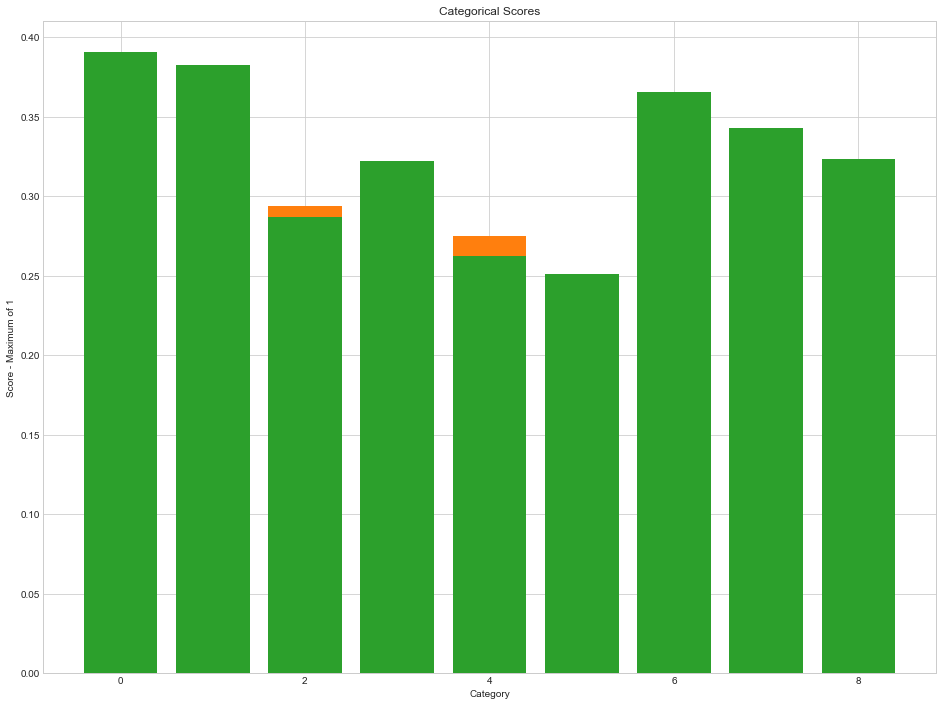

In [132]:
plt.figure(figsize=(16, 12))
plt.title('Categorical Scores')
plt.ylabel('Score - Maximum of 1')
plt.xlabel('Category')
sns.set_style('whitegrid')
plt.bar(np.arange(9), menlo_scores, label='Menlo Park')
plt.bar(np.arange(9), oakland_scores, label='Oakland')
plt.bar(np.arange(9), sf_scores, label='San Francisco')

In [137]:
score_data_df = pd.DataFrame(data=np.vstack((oakland_scores, sf_scores, menlo_scores)), 
             index=['Oakland', 'San Franscisco', 'Menlo Park'])

In [138]:
score_data_df

,0,1,2,3,4,5,6,7,8
Oakland,0.386513,0.376990,0.294217,0.318962,0.275020,0.238657,0.347688,0.340310,0.315553
San Franscisco,0.390738,0.382653,0.286761,0.321963,0.262179,0.251408,0.365590,0.343215,0.323760
Menlo Park,0.178609,0.165208,0.140419,0.143825,0.129307,0.165695,0.197469,0.138814,0.161167


In [139]:
score_data_df.columns.values

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [140]:
category_map_dict = {
    0: 'Economy', 1: 'City Government', 2: 'Education', 
    3: 'Energy', 4: 'Health', 5: 'Transportation', 
    6: 'Infrastructure', 7: 'Public Safety', 8: 'Recreation'
}

In [142]:
score_data_df.rename(columns = category_map_dict, inplace=True)

In [143]:
score_data_df

,Economy,City Government,Education,Energy,Health,Transportation,Infrastructure,Public Safety,Recreation
Oakland,0.386513,0.376990,0.294217,0.318962,0.275020,0.238657,0.347688,0.340310,0.315553
San Franscisco,0.390738,0.382653,0.286761,0.321963,0.262179,0.251408,0.365590,0.343215,0.323760
Menlo Park,0.178609,0.165208,0.140419,0.143825,0.129307,0.165695,0.197469,0.138814,0.161167


In [ ]:
sns.barplot(x = score_data_dfre_data_df.columns.values, y = )

In [151]:
score_melt = pd.melt(score_data_df, id_vars=score_data_df.index, value_vars=score_data_df.columns.values)

/Users/akhiljalan/anaconda/lib/python3.6/site-packages/pandas/core/reshape/reshape.py:731: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  frame = frame.loc[:, id_vars + value_vars]
/Users/akhiljalan/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [152]:
plt.rcParams['figure.figsize'] = [16, 12]

In [154]:
score_melt.head()

,Oakland,San Franscisco,Menlo Park,variable,value
0,NaN,NaN,NaN,Economy,0.386513
1,NaN,NaN,NaN,Economy,0.390738
2,NaN,NaN,NaN,Economy,0.178609
3,NaN,NaN,NaN,City Government,0.376990
4,NaN,NaN,NaN,City Government,0.382653


In [159]:
score_melt['city'] = ['Oakland', 'San Francisco', 'Menlo Park'] * 9

In [160]:
score_melt

,Oakland,San Franscisco,Menlo Park,variable,value,city
0,NaN,NaN,NaN,Economy,0.386513,Oakland
1,NaN,NaN,NaN,Economy,0.390738,San Francisco
2,NaN,NaN,NaN,Economy,0.178609,Menlo Park
3,NaN,NaN,NaN,City Government,0.376990,Oakland
4,NaN,NaN,NaN,City Government,0.382653,San Francisco
5,NaN,NaN,NaN,City Government,0.165208,Menlo Park
6,NaN,NaN,NaN,Education,0.294217,Oakland
7,NaN,NaN,NaN,Education,0.286761,San Francisco
8,NaN,NaN,NaN,Education,0.140419,Menlo Park
9,NaN,NaN,NaN,Energy,0.318962,Oakland


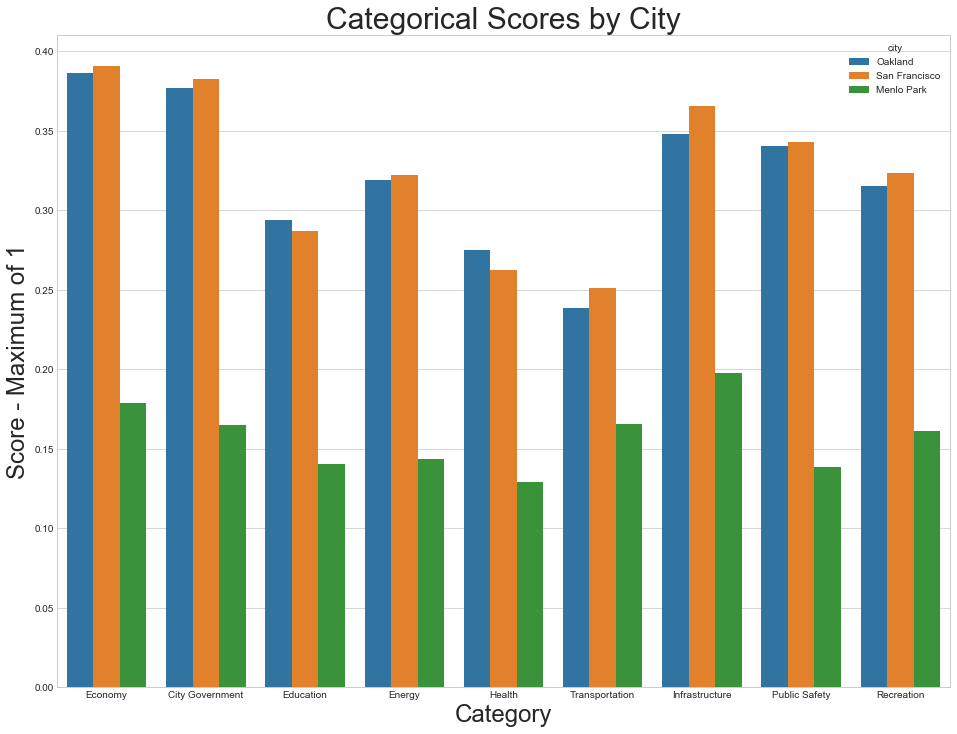

In [164]:
sns.barplot(x='variable', y='value', hue='city', data=score_melt)
plt.title('Categorical Scores by City', fontsize=30)
plt.ylabel('Score - Maximum of 1', fontsize=24)
plt.xlabel('Category', fontsize=24)
sns.set_style('whitegrid')
plt.savefig('../data/scores_barplot.png')
# plt.bar(np.arange(9), menlo_scores, label='Menlo Park')
# plt.bar(np.arange(9), oakland_scores, label='Oakland')
# plt.bar(np.arange(9), sf_scores, label='San Francisco')

In [165]:
score_data_df.to_csv('../data/city_scores.csv')